In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/medicare_partd_20162020.csv')

In [3]:
df.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Tot_Benes_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,...,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Tot_Benes_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Avg_Spnd_Per_Bene_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,216273.87,1052113.0,8913.0,3428.0,0.206895,24.264992,...,118923.24,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,216273.87,1052113.0,8913.0,3428.0,0.206895,24.264992,...,118923.24,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,378040.97,1750907.0,14610.0,6564.0,0.215986,25.875494,...,210217.15,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,378040.97,1750907.0,14610.0,6564.0,0.215986,25.875494,...,210217.15,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
4,Abacavir,Abacavir Sulfate,8,Overall,19337054.97,4253483.0,66523.0,9008.0,4.549384,290.682245,...,9241054.74,2972406.0,37325,5068.0,3.491071,247.583516,1823.412538,0,-0.000856,-0.064052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13570 entries, 0 to 13569
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13570 non-null  object 
 1   Gnrc_Name                        13570 non-null  object 
 2   Tot_Mftr                         13570 non-null  int64  
 3   Mftr_Name                        13570 non-null  object 
 4   Tot_Spndng_2016                  9163 non-null   float64
 5   Tot_Dsg_Unts_2016                9163 non-null   float64
 6   Tot_Clms_2016                    9163 non-null   float64
 7   Tot_Benes_2016                   9123 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2016  9163 non-null   float64
 9   Avg_Spnd_Per_Clm_2016            9163 non-null   float64
 10  Avg_Spnd_Per_Bene_2016           8992 non-null   float64
 11  Outlier_Flag_2016                9163 non-null   float64
 12  Tot_Spndng_2017   

## how many outliers are there?

In [5]:
df['Outlier_Flag_2020'].value_counts()

0    11997
1     1573
Name: Outlier_Flag_2020, dtype: int64

In [6]:
df_no_outliers = df[df['Outlier_Flag_2020']==0][df['Outlier_Flag_2019']==0][df['Outlier_Flag_2018']==0][df['Outlier_Flag_2017']==0][df['Outlier_Flag_2016']==0]
df_no_outliers

/var/folders/5x/x41g3czd3g7d18145p3cfc9r0000gn/T/ipykernel_23766/194364393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_outliers = df[df['Outlier_Flag_2020']==0][df['Outlier_Flag_2019']==0][df['Outlier_Flag_2018']==0][df['Outlier_Flag_2017']==0][df['Outlier_Flag_2016']==0]


,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Tot_Benes_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,...,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Tot_Benes_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Avg_Spnd_Per_Bene_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,2.162739e+05,1052113.0,8913.0,3428.0,0.206895,24.264992,...,1.189232e+05,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,2.162739e+05,1052113.0,8913.0,3428.0,0.206895,24.264992,...,1.189232e+05,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,3.780410e+05,1750907.0,14610.0,6564.0,0.215986,25.875494,...,2.102171e+05,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,3.780410e+05,1750907.0,14610.0,6564.0,0.215986,25.875494,...,2.102171e+05,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
4,Abacavir,Abacavir Sulfate,8,Overall,1.933705e+07,4253483.0,66523.0,9008.0,4.549384,290.682245,...,9.241055e+06,2972406.0,37325,5068.0,3.491071,247.583516,1823.412538,0,-0.000856,-0.064052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13561,Zytiga,Abiraterone Acetate,2,Overall,8.230387e+08,11513285.0,96758.0,16248.0,71.486004,8506.157016,...,3.471562e+08,2280348.0,32446,5877.0,164.554800,10699.508301,59070.315865,0,0.123561,0.231749
13563,Zytiga,Abiraterone Acetate,1,Janssen Biotech,8.230387e+08,11513285.0,96758.0,16248.0,71.486004,8506.157016,...,6.033912e+07,720136.0,6252,1427.0,83.788512,9651.171419,42283.898886,0,-0.053984,0.040497
13566,Zyvox,Linezolid In Dextrose 5%,3,Overall,7.401741e+05,2751624.0,934.0,396.0,0.269932,792.477570,...,8.226390e+04,503406.0,206,89.0,0.163565,399.339320,924.313483,0,-0.202846,-0.117715
13567,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,5.808326e+05,2129113.0,771.0,326.0,0.272805,753.349663,...,5.289931e+04,323106.0,127,62.0,0.163721,416.530000,853.214677,0,-0.235269,-0.119837


Overall, there are only 7724 rows without an outlier flag. That is only about 57% of the data so I will not drop outliers to preserve the amount of data

In [7]:
df.isnull().sum()

Brnd_Name                             0
Gnrc_Name                             0
Tot_Mftr                              0
Mftr_Name                             0
Tot_Spndng_2016                    4407
Tot_Dsg_Unts_2016                  4407
Tot_Clms_2016                      4407
Tot_Benes_2016                     4447
Avg_Spnd_Per_Dsg_Unt_Wghtd_2016    4407
Avg_Spnd_Per_Clm_2016              4407
Avg_Spnd_Per_Bene_2016             4578
Outlier_Flag_2016                  4407
Tot_Spndng_2017                    3491
Tot_Dsg_Unts_2017                  3491
Tot_Clms_2017                      3491
Tot_Benes_2017                     3628
Avg_Spnd_Per_Dsg_Unt_Wghtd_2017    3491
Avg_Spnd_Per_Clm_2017              3491
Avg_Spnd_Per_Bene_2017             3707
Outlier_Flag_2017                  3491
Tot_Spndng_2018                    2444
Tot_Dsg_Unts_2018                  2444
Tot_Clms_2018                      2444
Tot_Benes_2018                     2687
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018    2444


In [8]:
df.fillna(0, inplace=True)

In [9]:
df['Tot_Spndng_2016'].sum(), df['Tot_Spndng_2017'].sum(), df['Tot_Spndng_2018'].sum(), df['Tot_Spndng_2019'].sum(), df['Tot_Spndng_2020'].sum()

(282448226167.379,
 303919437409.199,
 334130116341.15906,
 366065084629.7591,
 397300615152.82104)

In [10]:
df[['Tot_Spndng_2016','Tot_Spndng_2017','Tot_Spndng_2018','Tot_Spndng_2019','Tot_Spndng_2020']].sum()

Tot_Spndng_2016    2.824482e+11
Tot_Spndng_2017    3.039194e+11
Tot_Spndng_2018    3.341301e+11
Tot_Spndng_2019    3.660651e+11
Tot_Spndng_2020    3.973006e+11
dtype: float64

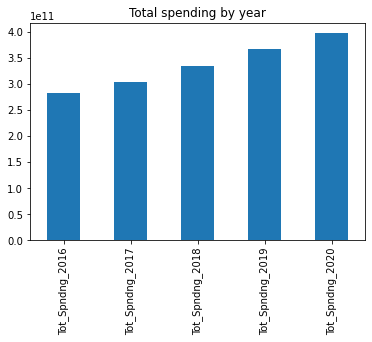

In [11]:
df[['Tot_Spndng_2016','Tot_Spndng_2017','Tot_Spndng_2018','Tot_Spndng_2019','Tot_Spndng_2020']].sum().plot(kind='bar')
plt.title('Total spending by year');

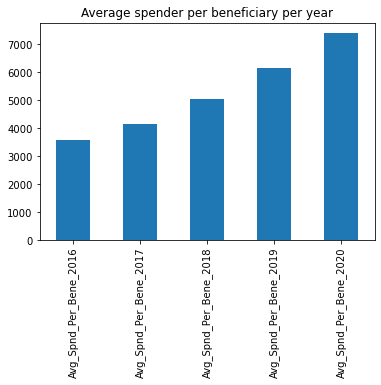

In [12]:

df[['Avg_Spnd_Per_Bene_2016','Avg_Spnd_Per_Bene_2017','Avg_Spnd_Per_Bene_2018','Avg_Spnd_Per_Bene_2019','Avg_Spnd_Per_Bene_2020']].mean().plot(kind='bar')
plt.title('Average spender per beneficiary per year');

In [13]:
df[['Brnd_Name', 'Gnrc_Name','Tot_Mftr','Mftr_Name']]

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us
4,Abacavir,Abacavir Sulfate,8,Overall
...,...,...,...,...
13565,Zyvox,Linezolid,1,Pharmaci/Pfizer
13566,Zyvox,Linezolid In Dextrose 5%,3,Overall
13567,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer
13568,Zyvox,Linezolid In Dextrose 5%,1,Phar-Prep/Pfize


In [14]:
df['Brnd_Name'].value_counts()

Insulin Syringe         65
Fenofibrate             49
Gabapentin              44
Levetiracetam*          36
Doxycycline Hyclate*    35
                        ..
Icosapent Ethyl          2
Idhifa                   2
Ilaris                   2
Ilevro                   2
Loestrin                 2
Name: Brnd_Name, Length: 3439, dtype: int64

In [15]:
df[df['Tot_Spndng_2016']>0]

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Tot_Benes_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,...,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Tot_Benes_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Avg_Spnd_Per_Bene_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,216273.87,1052113.0,8913.0,3428.0,0.206895,24.264992,...,118923.24,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,216273.87,1052113.0,8913.0,3428.0,0.206895,24.264992,...,118923.24,547006.0,4457,1595.0,0.217701,26.682351,74.560025,0,0.004212,0.012809
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,378040.97,1750907.0,14610.0,6564.0,0.215986,25.875494,...,210217.15,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,378040.97,1750907.0,14610.0,6564.0,0.215986,25.875494,...,210217.15,1046616.0,8408,3905.0,0.200851,25.002040,53.832817,0,0.071842,-0.017999
4,Abacavir,Abacavir Sulfate,8,Overall,19337054.97,4253483.0,66523.0,9008.0,4.549384,290.682245,...,9241054.74,2972406.0,37325,5068.0,3.491071,247.583516,1823.412538,0,-0.000856,-0.064052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13565,Zyvox,Linezolid,1,Pharmaci/Pfizer,5831415.69,79547.0,1956.0,1707.0,142.396746,2981.296365,...,358178.67,4088.0,82,61.0,158.786418,4368.032561,5871.781475,1,-0.255651,0.027610
13566,Zyvox,Linezolid In Dextrose 5%,3,Overall,740174.05,2751624.0,934.0,396.0,0.269932,792.477570,...,82263.90,503406.0,206,89.0,0.163565,399.339320,924.313483,0,-0.202846,-0.117715
13567,Zyvox,Linezolid In Dextrose 5%,1,Pharmaci/Pfizer,580832.59,2129113.0,771.0,326.0,0.272805,753.349663,...,52899.31,323106.0,127,62.0,0.163721,416.530000,853.214677,0,-0.235269,-0.119837
13568,Zyvox,Linezolid In Dextrose 5%,1,Phar-Prep/Pfize,137426.88,527111.0,140.0,70.0,0.260717,981.620571,...,21286.31,129600.0,64,25.0,0.164246,332.598594,851.452400,0,-0.051773,-0.109095


In [16]:
df.groupby(by=df['Gnrc_Name']).mean()

,Tot_Mftr,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Tot_Benes_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Avg_Spnd_Per_Bene_2016,Outlier_Flag_2016,Tot_Spndng_2017,...,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Tot_Benes_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Avg_Spnd_Per_Bene_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
Gnrc_Name,,,,,,,,,,,,,,,,,,,,,
0.9 % Sodium Chloride,1.750000,1.322165e+06,1.144148e+08,51730.250000,19647.750000,0.024030,17.717818,45.385467,0.000000,1.167425e+06,...,1.513711e+06,1.594753e+08,69772.000000,27139.750000,0.027413,48.307469,74.611688,0.125000,-0.043738,0.015613
Aa 4.25 %/Calcium/Lytes/D5W,1.000000,3.737860e+03,1.140000e+05,16.000000,0.000000,0.032788,233.616250,0.000000,1.000000,2.338480e+03,...,4.913750e+03,1.300000e+05,13.000000,0.000000,0.037798,377.980769,0.000000,1.000000,-0.012041,0.036186
Aa 4.25%/Calcium/Lytes/Dex 10%,1.000000,1.410544e+04,3.954260e+05,86.000000,17.000000,0.035672,164.016744,829.731765,0.000000,0.000000e+00,...,1.202700e+04,3.230050e+05,33.000000,11.000000,0.037235,364.454545,1093.363636,1.000000,-0.197115,0.010780
Aa 5 %/Calcium/Lytes/Dext 20 %,1.000000,1.414247e+04,3.444450e+05,47.000000,0.000000,0.041059,300.903617,0.000000,0.000000,2.902063e+04,...,5.359298e+04,9.070020e+05,165.000000,28.000000,0.059088,324.805939,1914.035000,0.000000,0.019293,0.095276
Aa 5%/D15w/Electrolytes,1.000000,1.250367e+05,2.367833e+06,375.000000,34.000000,0.052806,333.431307,3677.551177,0.000000,1.233179e+05,...,4.193846e+04,9.200690e+05,138.000000,23.000000,0.045582,303.901884,1823.411304,0.000000,-0.004239,-0.036112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoledronic Acid/Mannitol-Water,1.636364,4.670278e+05,8.922618e+04,894.000000,947.909091,3.677450,364.511247,362.870484,0.000000,4.641641e+05,...,2.607380e+05,1.050284e+05,1048.000000,1033.727273,3.515443,348.383259,350.654190,0.000000,-0.107012,-0.086327
Zolmitriptan,1.600000,1.083900e+06,5.440130e+04,4301.500000,1368.400000,19.270426,254.282105,1076.071641,0.000000,1.330539e+06,...,1.617147e+06,7.957220e+04,6275.700000,1625.000000,30.045806,403.585926,1583.387197,0.550000,0.067500,0.039211
Zolpidem Tartrate,1.548387,8.607856e+06,1.627102e+07,472958.516129,123705.064516,3.992442,147.096622,697.903189,0.064516,7.170567e+06,...,5.805175e+06,1.806953e+07,507544.516129,110395.870968,9.927462,202.994257,912.045191,0.064516,-0.114371,-0.060765


In [17]:
df.groupby(by=df['Brnd_Name']).mean()

,Tot_Mftr,Tot_Spndng_2016,Tot_Dsg_Unts_2016,Tot_Clms_2016,Tot_Benes_2016,Avg_Spnd_Per_Dsg_Unt_Wghtd_2016,Avg_Spnd_Per_Clm_2016,Avg_Spnd_Per_Bene_2016,Outlier_Flag_2016,Tot_Spndng_2017,...,Tot_Spndng_2020,Tot_Dsg_Unts_2020,Tot_Clms_2020,Tot_Benes_2020,Avg_Spnd_Per_Dsg_Unt_Wghtd_2020,Avg_Spnd_Per_Clm_2020,Avg_Spnd_Per_Bene_2020,Outlier_Flag_2020,Chg_Avg_Spnd_Per_Dsg_Unt_19_20,CAGR_Avg_Spnd_Per_Dsg_Unt_16_20
Brnd_Name,,,,,,,,,,,,,,,,,,,,,
1st Tier Unifine Pentips,1.000000,2.162739e+05,1.052113e+06,8913.000000,3428.000000,0.206895,24.264992,63.090394,0.0,2.179380e+05,...,1.189232e+05,5.470060e+05,4457.000000,1595.000000,0.217701,26.682351,74.560025,0.000000,0.004212,0.012809
1st Tier Unifine Pentips Plus,1.000000,3.780410e+05,1.750907e+06,14610.000000,6564.000000,0.215986,25.875494,57.593079,0.0,4.021247e+05,...,2.102171e+05,1.046616e+06,8408.000000,3905.000000,0.200851,25.002040,53.832817,0.000000,0.071842,-0.017999
Abacavir,1.777778,4.297123e+06,9.452184e+05,14782.888889,2595.777778,2.550016,163.009021,808.684070,0.0,3.731993e+06,...,2.053568e+06,6.605347e+05,8294.444444,1309.333333,3.330419,231.602296,1152.784920,0.222222,-0.044936,-0.063539
Abacavir-Lamivudine,1.714286,4.215938e+06,1.256686e+05,3973.142857,1929.000000,14.387795,454.581280,932.222910,0.0,1.464337e+07,...,4.242056e+06,3.940431e+05,10788.000000,1908.142857,10.976762,399.418752,1898.870670,0.571429,-0.063167,-0.154099
Abacavir-Lamivudine-Zidovudine,1.000000,1.278772e+07,6.084550e+05,9768.000000,1333.000000,21.016709,1309.144305,9593.189475,0.0,1.015849e+07,...,2.085405e+06,9.633300e+04,1585.000000,290.000000,21.647874,1315.712700,7191.050448,0.000000,0.004455,0.007425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyprexa Relprevv,1.000000,6.792151e+06,6.841000e+03,5983.000000,548.000000,1001.476427,1135.241611,12394.435328,0.0,6.241954e+06,...,5.449379e+06,5.489000e+03,4962.000000,432.000000,1001.714611,1098.222223,12614.302477,0.000000,-0.000823,0.000059
Zyprexa Zydis,1.000000,4.667863e+06,1.811440e+05,4165.000000,581.000000,26.221459,1120.735304,8034.186816,0.0,4.241793e+06,...,4.230637e+06,1.371330e+05,2913.000000,320.000000,31.193752,1452.329845,13220.740125,0.000000,0.026237,0.044366
Zyprexa*,1.000000,2.232939e+07,1.029470e+06,24619.000000,3393.000000,22.490082,906.998338,6581.017415,0.0,2.013662e+07,...,1.850749e+07,6.963630e+05,14890.000000,1782.000000,27.402873,1242.947628,10385.796958,0.000000,0.018491,0.050634


In [18]:
df[['Tot_Spndng_2016','Tot_Spndng_2017','Tot_Spndng_2018','Tot_Spndng_2019','Tot_Spndng_2020']].groupby(by=df['Brnd_Name']).sum()

,Tot_Spndng_2016,Tot_Spndng_2017,Tot_Spndng_2018,Tot_Spndng_2019,Tot_Spndng_2020
Brnd_Name,,,,,
1st Tier Unifine Pentips,4.325477e+05,4.358761e+05,3.343876e+05,2.784034e+05,2.378465e+05
1st Tier Unifine Pentips Plus,7.560819e+05,8.042494e+05,7.388057e+05,6.860628e+05,4.204343e+05
Abacavir,3.867411e+07,3.358794e+07,2.895346e+07,2.102365e+07,1.848211e+07
Abacavir-Lamivudine,2.951156e+07,1.025036e+08,4.916186e+07,3.888254e+07,2.969440e+07
Abacavir-Lamivudine-Zidovudine,2.557544e+07,2.031699e+07,1.391064e+07,9.699198e+06,4.170809e+06
...,...,...,...,...,...
Zyprexa Relprevv,1.358430e+07,1.248391e+07,1.288415e+07,1.207953e+07,1.089876e+07
Zyprexa Zydis,9.335725e+06,8.483586e+06,8.931964e+06,8.513630e+06,8.461274e+06
Zyprexa*,4.465878e+07,4.027325e+07,4.084229e+07,3.762638e+07,3.701498e+07


<Figure size 864x1440 with 0 Axes>

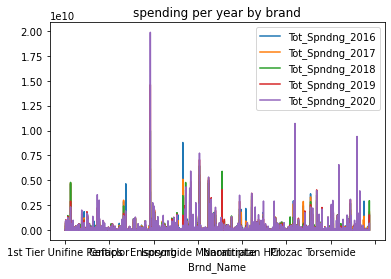

In [19]:
plt.figure(figsize=(12,20))
df[['Tot_Spndng_2016','Tot_Spndng_2017','Tot_Spndng_2018','Tot_Spndng_2019','Tot_Spndng_2020']].groupby(by=df['Brnd_Name']).sum().plot()
plt.title('spending per year by brand');

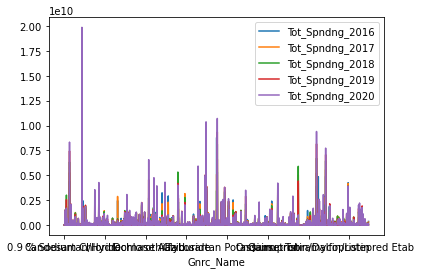

In [20]:
df[['Tot_Spndng_2016','Tot_Spndng_2017','Tot_Spndng_2018','Tot_Spndng_2019','Tot_Spndng_2020']].groupby(by=df['Gnrc_Name']).sum().plot();

In [21]:
df.to_csv('data/medicare_partd_20162020_filled.csv', index=False)